In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%precision 3

'%.3f'

# t-검정

### 가설 검정단계

- 1단계. 가설 설정
- 2단계. 유의수준을 설정(α=0.05)
- 3단계. 검정 통계량 및 p-value 계산
- 4단계. 귀무가설 기각 여부 판단 => p-value < α 이면 귀무가설 기각

#### p-value란?

- 검정과정에서 밝혀진 유의수준

## 1. 단일표본과 모집단의 평균차이 검정

- 양측검정
    - 귀무가설($H_0$) : $ \mu = \mu_0 $
    - 대립가설($H_1$) : $ \mu \ne \mu_0 $
    
- 좌측검정
    - 귀무가설($H_0$) : $ \mu = \mu_0 $
    - 대립가설($H_1$) : $ \mu < \mu_0 $
    
- 우측검정
    - 귀무가설($H_0$) : $ \mu = \mu_0 $
    - 대립가설($H_1$) : $ \mu > \mu_0 $

### 1) one sample Z-test

- 모분산을 아는 경우
- 표본데이터가 충분히 많은 경우
- 검정통계량 : $ Z = {{\bar X - \mu} \over {\sigma \over \sqrt n }} \sim N(0,1) $ 

#### 예제.
A교수는 지난 20년 동안 1000명의 학생들을 대상으로 통계학개론을 강의하였다. 올해도 36명을 대상으로 통계학개론을 강의하고 있다고 한다. 이번 학기 학생들이 지난 과거의 학생들과 다른지 알고 싶다. 과거 1000명 학생들의 통계학
개론 평균점수는 99점이고 표준편차는 2.5이고, 이번 학기 학생들의 평균은 100, 표준편차는 5라고 한다. 이번 학기 학생들은 지난 과거 학생들과 다르다고 말할 수 있을까?

#### 가설검정 단계
1. 가설설정
- 귀무가설($H_0$) : $ \mu = 99 $
- 대립가설($H_1$) : $ \mu \ne 99 $


2. 유의수준 $\alpha = 0.05$


3. 검정통계량 계산 


4. p값 계산하여 유의수준과 비교 후 귀무가설 기각여부 판단

In [6]:
p_mean, p_std, s_mean, s_std, n, alpha = 99,2.5,100,5,36,0.05

Z = (s_mean-p_mean) / (p_std/np.sqrt(n))
print(f'검정통계량: {Z:.4f}')

rv = stats.norm()
p_value = (1-rv.cdf(Z)) *2 if Z > 0 else rv.cdf(Z)*2
print(f'p_value: {p_value:.4f}')

result = 'Reject H0' if p_value < alpha else 'Accept H0' 
print(f'{result}')

검정통계량: 2.4000
p_value: 0.0164
Reject H0


### 2) one sample t-test

- 모분산을 모르는 경우
- 검정통계량 : $ t = {{\bar X - \mu} \over {S \over \sqrt n }} \sim t(n-1) $ 
- 표본의 크기 커질수록 t-분포는 정규분포로 근사하므로 모분산대신에 표본분산을 사용한 one sample Z-검정과 같은 결과가 나옴

In [29]:
p_mean, p_std, s_mean, s_std, n, alpha = 99,2.5,100,5,36,0.05

t = (s_mean-p_mean) / (s_std/np.sqrt(n))
print(f'검정통계량: {t:.4f}')

rv = stats.t(n-1)
p_value = (1-rv.cdf(t)) *2 if t > 0 else rv.cdf(t)*2
print(f'p_value: {p_value:.4f}')

result = 'Reject H0' if p_value < alpha else 'Accept H0' 
print(f'{result}')

검정통계량: 1.2000
p_value: 0.2382
Accept H0


### scipy.stats의 ttest_1samp() 함수

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp

## 2. 두 집단의 평균차이 검정

- 대응표본(종속관계) t-검정 
- 독립표본 t-검정

### 1) 대응표본(paired) t-test

짝지은 두 그룹의 차이값에 대한 단일표본 t-test 적용

#### 가설검정 단계

1. 데이터를 건강식품 복용전과 후의 몸무게 차이를 계산한 데이터로 변환


2. 일표본 t-test 과정으로 검정 수행
    - **scipy.stats.ttest_rel()**

#### 예제

A제약회사에서 개발한 건강식품이 체중 조절에 효과가 있는지 실험하기 위해 20명을 대상으로 건강식품 복용 전과 후의 몸무게를 측정하였다. 이 건강식품이 체중 조절에 효과가 있는가(체중이 감소되었는가)? 유의수준을 5%, 1%로 두었을 때 가설검정을 수행하시오.

In [10]:
data = np.array([[75, 73],[74, 74],[75, 76],[75, 71],[83, 76],
                 [77, 68],[82, 75],[62, 61],[77, 68],[82, 75],
                 [72, 70],[75, 71],[78, 71],[71, 70],[68, 67],
                 [76, 73],[71, 74],[54, 50],[75, 76],[77, 68]])

In [11]:
before = data[:,0]
after = data[:,1]
diff = before - after
diff

array([ 2,  0, -1,  4,  7,  9,  7,  1,  9,  7,  2,  4,  7,  1,  1,  3, -3,
        4, -1,  9])

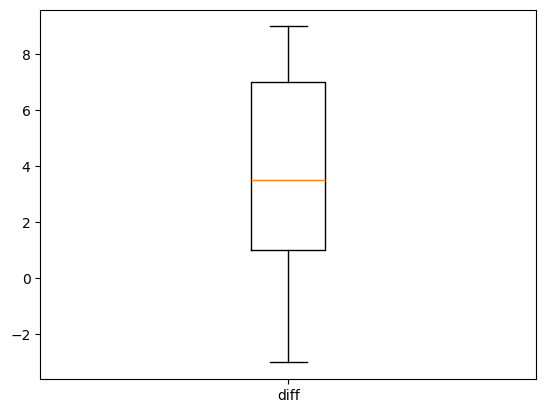

In [14]:
plt.boxplot(diff)
plt.xticks([1],['diff'])
plt.show()

In [32]:
# skew -> 왜도
s_mean, s_std, s_skew = diff.mean(), diff.std(ddof=1),stats.skew(diff)
s_mean, s_std, s_skew

(3.600, 3.691, 0.043)

In [33]:
stats.ttest_1samp(diff, popmean=0, alternative='two-sided')

TtestResult(statistic=4.362266189267664, pvalue=0.00033530219011457306, df=19)

In [34]:
stats.ttest_1samp(diff, popmean=0, alternative='greater')

TtestResult(statistic=4.362266189267664, pvalue=0.00016765109505728653, df=19)

=> 귀무가설을 기각하므로 체중조절에 효과가 있다고 말할 수 있다.

- 체중이 감소되었는지 가설검정을 수행

In [30]:
# ddof = 자유도 
p_mean, s_mean, s_std, n, alpha = 0, diff.mean(), diff.std(ddof=1),20,0.05

t = (s_mean-p_mean) / (s_std/np.sqrt(n))
print(f'검정통계량: {t:.4f}')

rv = stats.t(n-1)
p_value = 1-rv.cdf(t) if t > 0 else rv.cdf(t)
print(f'p_value: {p_value:.4f}')

result = 'Reject H0' if p_value < alpha else 'Accept H0' 
print(f'{result}')

검정통계량: 4.3623
p_value: 0.0002
Reject H0


#### 일표본을 t-검정을 수행할 때
- 자료유형: 반응변수 - 연속형, 설명변수 - 그룹 1개(범주형)
- Z검정: 모분산을 아는 경우
- t검정: 모분산을 모르는 경우
- 표본의 크기:
  - 대표본인 경우(n>=30) -> t검정 (모집단의 분포가 정규분포-정규성만족)
  - 소표본인 경우:
    - 정규성을 만족하지 않는 경우: 비모수적 방법(부호 검정, 부호 순위 검정)
    - 정규성을 만족하는 경우: t검정

#### 정규성 검정
- 샤피로-윌크 테스트(Shapiro-Wilk test)
- H0: 정규분포를 따른다
- scipy.stats.shapiro()

In [36]:
stats.shapiro(diff)

ShapiroResult(statistic=0.937451183795929, pvalue=0.21451494097709656)

In [37]:
df = pd.read_csv('data/potato.csv')
df.head(3)

,무게
0,122.02
1,131.73
2,130.60


In [38]:
stats.shapiro(df.무게)

ShapiroResult(statistic=0.9412715435028076, pvalue=0.43486055731773376)

In [39]:
stats.ttest_1samp(df.무게, 130)

TtestResult(statistic=-1.4551960206404198, pvalue=0.16933464230414275, df=13)

#### paired t-test 함수 적용

- 데이터 분포 시각화

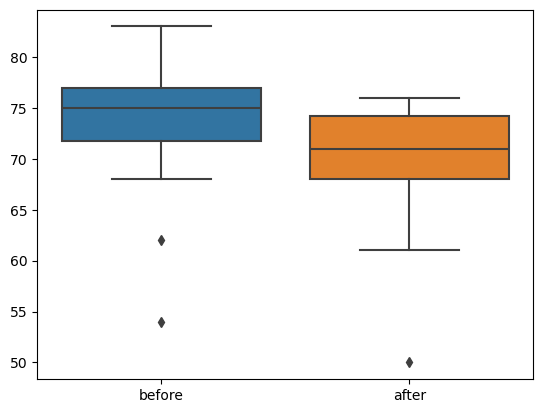

In [40]:
sns.boxplot(data)
plt.xticks([0,1],['before','after'])
plt.show()

- 정규성 검정

In [41]:
stats.shapiro(before)

ShapiroResult(statistic=0.8608343601226807, pvalue=0.008140737190842628)

In [42]:
stats.shapiro(after)

ShapiroResult(statistic=0.7824621796607971, pvalue=0.00047861351049505174)

- 비모수적 검정: Wilcoxon

In [43]:
stats.wilcoxon(before, after)

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=14.5, pvalue=0.0011431765973566523)

In [44]:
stats.wilcoxon(before-after)

WilcoxonResult(statistic=14.5, pvalue=0.0011431765973566523)

- paired t-test 함수 적용

In [45]:
stats.ttest_rel(before, after)

TtestResult(statistic=4.362266189267664, pvalue=0.00033530219011457306, df=19)

### 2) 독립표본 t-test

독립된 두 모집단의 평균차이 검정

#### 가설검정 단계

1. 데이터 시각화(분포분석)


2. 정규성 검정
    - shapiro-wilk test
    - 정규성 만족하지 않는 경우 비모수적 평균차이 검정 : Mann Whiteny U test
    

3. 등분산성 검정
    - Levene test


4. 검정통계량과 p값 계산하여 기각여부 판단
    - stats.ttest_ind()

#### 예제
어느 학교에서 학생들을 두 가지 교육방식 (A, B)에 의해 교육을 한 뒤 각 그룹에서 무작위로 10명씩 시험성적 표본을 얻었다. 학생들의 시험성적은 정규분포를 따르며 분산이 252으로 알려져 있다고 한다. 두 교육방식에 의한 성적 차이에 대한 95% 신뢰구간을 구하고, 두 집단 간 성적에 차이가 있는지 양측검정을 수행하시오.

In [46]:
groupA = [215, 258, 248, 270, 291, 299, 244, 265, 250, 260]
groupB = [257, 284, 305, 308, 320, 240, 248, 278, 280, 280]

In [47]:
df = pd.DataFrame({'A':groupA,'B':groupB})
df

,A,B
0,215,257
1,258,284
2,248,305
3,270,308
4,291,320
5,299,240
6,244,248
7,265,278
8,250,280
9,260,280


In [48]:
df.describe()

,A,B
count,10.00000,10.000000
mean,260.00000,280.000000
std,23.88863,26.208565
min,215.00000,240.000000
25%,248.50000,262.250000
50%,259.00000,280.000000
75%,268.75000,299.750000
max,299.00000,320.000000


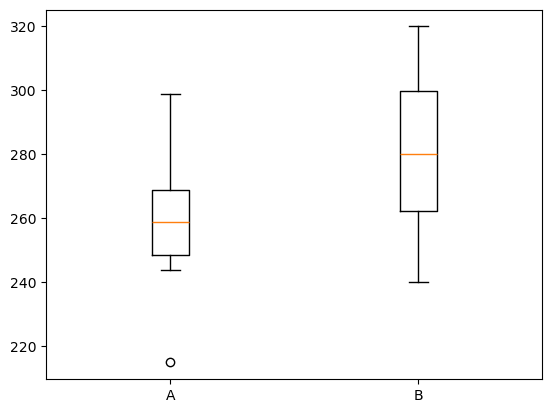

In [50]:
# boxplot
plt.boxplot(df)
plt.xticks([1,2],['A','B'])
plt.show()

- 정규성 검정

In [51]:
stats.shapiro(df.A)

ShapiroResult(statistic=0.9620078206062317, pvalue=0.8085032105445862)

In [52]:
stats.shapiro(df.B)

ShapiroResult(statistic=0.9506453275680542, pvalue=0.6761407256126404)

=> 두 그룹의 데이터는 모두 정규성을 만족한다.

In [56]:
# 이상치 제거(A의 최솟값 1개가 이상치를 띔)
a = df.A[df.A > df.A.min()]
stats.shapiro(a)

ShapiroResult(statistic=0.8994738459587097, pvalue=0.24896520376205444)

- 등분산성 검정
  - H0: 두 집단의 분산이 같다(등분산이다.)

In [54]:
# 분산이 같은지
stats.levene(df.A,df.B)

LeveneResult(statistic=0.11090193393804541, pvalue=0.7429671197300978)

In [57]:
stats.levene(a, df.B)

LeveneResult(statistic=0.6447632044528006, pvalue=0.43307491134154386)

In [58]:
np.mean(a), np.mean(df.A), np.mean(df.B)

(265.000, 260.000, 280.000)

- 독립표본 t-test
    - ttest_ind(a,b): 평균이 같은지

In [61]:
# 평균이 같은지
stats.ttest_ind(df.A, df.B,equal_var=True)

TtestResult(statistic=-1.7834724523628507, pvalue=0.09137972048711938, df=18.0)

=> 두 그룹의 평균은 차이가 없다. -> 두 교육방식의 차이가 없다.

### 문제1.

두 종류 자동차의 연비 비교하여 차이가 있는지 유의수준 5%에서 가설검정을 수행하시오.

In [62]:
A = [12.60, 15.15,  17.62,  16.81,  15.51,  15.12,  14.39,  15.20,  13.70,  14.75,     15.13,  15.66,  13.69,  15.74,  14.96,  15.20,  16.45,  13.66,  16.16,  14.47]B = [13.77,  13.63,  12.63,  14.13,  13.50,  13.09,  13.96,  13.41,  14.03,  14.25,     13.47,  13.43,  13.24,  14.61,  13.82,  14.07,  15.96,  13.69,  14.25,  14.50]

- 시각화
- 정규성 검정
- 등분산성 검정
- 독립표본 t-test 수행

In [66]:
df1 = pd.DataFrame({'A':A,'B':B})
df1.head(3)

,A,B
0,12.60,13.77
1,15.15,13.63
2,17.62,12.63


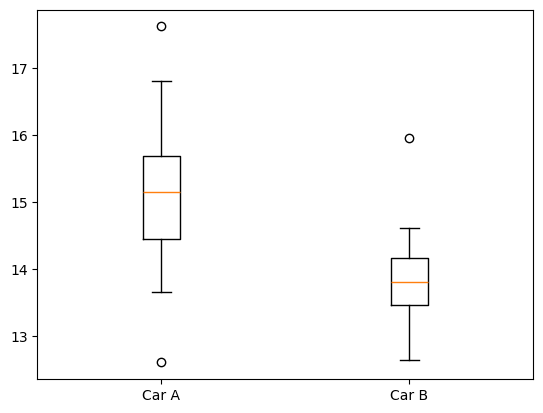

In [94]:
# boxplot
plt.boxplot(df1)
plt.xticks([1,2],['Car A','Car B'])
plt.show()

In [81]:
# 이상치 제거
a = df1.A[(df1.A.max() > df1.A) & (df1.A > df1.A.min())]
b = df1.B[df1.B.max() > df1.B]

In [88]:
stats.shapiro(df1.A), stats.shapiro(a) 

(ShapiroResult(statistic=0.9804083704948425, pvalue=0.939264714717865),
 ShapiroResult(statistic=0.9578261375427246, pvalue=0.5602654814720154))

In [89]:
stats.shapiro(df1.B), stats.shapiro(b) 

(ShapiroResult(statistic=0.9171656966209412, pvalue=0.08739905059337616),
 ShapiroResult(statistic=0.9835568070411682, pvalue=0.9754699468612671))

=> 두 그룹의 데이터는 모두 정규성을 만족한다.

In [91]:
# 등분산성 검정
stats.levene(df1.A,df1.B), stats.levene(a,b)

(LeveneResult(statistic=3.082483460226059, pvalue=0.0871982523331269),
 LeveneResult(statistic=3.213951045631207, pvalue=0.08165976148492812))

=> 두 그룹의 데이터는 분산이 같다.

In [93]:
# 독립표본 t-test
stats.ttest_ind(df1.A, df1.B,equal_var=True), stats.ttest_ind(a,b)

(TtestResult(statistic=4.010487120208981, pvalue=0.00027373538710399734, df=38.0),
 TtestResult(statistic=5.605793745508626, pvalue=2.5555020518408033e-06, df=35.0))

=> 두 그룹의 평균은 차이가 있다. -> 두 자동차의 연비 차이가 있다.

#### 문제2.

- 제품개발 시 사용하는 화학첨가제의 종류에 따른 제품 수율에 차이가 있는지 유의수준 5%에서 가설 검정을 수행하시오.

In [ ]:
A = [68.86, 74.64, 75.80, 76.41, 67.37, 79.98, 74.95, 
     76.36, 72.39, 76.73, 75.56, 73.59, 78.49, 69.49,
     72.38, 73.38, 77.29, 80.43, 73.94, 73.35]
B = [65.92, 64.49, 68.24, 74.38, 70.82, 61.30, 73.09,
     71.20, 74.31, 73.14, 68.76, 71.12, 65.62, 72.11,
     72.20, 76.57, 65.26  73.82, 71.42, 71.93]

### Mann-Whitney Test

- 정규성을 만족하지 않는 경우 독립표본에 대한 평균차이 검정을 위한 비모수적 방법

In [97]:
males = [19,22,16,19,24]
females = [20,11,17,12]

In [102]:
np.mean(males), np.std(males, ddof=1)

(20.000, 3.082)

In [103]:
np.mean(females), np.std(females, ddof=1)

(15.000, 4.243)

In [99]:
stats.shapiro(males), stats.shapiro(females)

(ShapiroResult(statistic=0.9604217410087585, pvalue=0.8109170198440552),
 ShapiroResult(statistic=0.9118359684944153, pvalue=0.4921836256980896))

In [101]:
stats.mannwhitneyu(males, females)

MannwhitneyuResult(statistic=16.0, pvalue=0.17609777149412875)